<a href="https://colab.research.google.com/github/adelalamo22/EasyMoney/blob/Trabajo_arbol_de_decision/Trabajo_ISI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cargamos las librerias necesarioas:

In [2]:
from tensorflow import keras as ks
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime

from keras import models
from tensorflow import keras as ks
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2 # Se encargan de hacer que los pesos no se disparen
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [3]:
# Definimos num_classes:
num_classes=10

Preparamos los datos de nuestro Dataset:

In [4]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


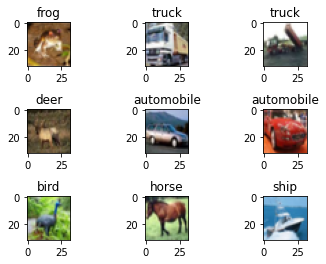

In [6]:
# Pintemos una muestra de las las imagenes del dataset MNIST

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

In [7]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [8]:
x_train_cnn = x_train.reshape((x_train.shape[0], 32, 32, 3))
x_test_cnn = x_test.reshape((x_test.shape[0], 32, 32, 3))
x_val_cnn = x_val.reshape((x_val.shape[0],32,32,3))

# Validamos el resultado
print('Train: X=%s, y=%s' % (x_train_cnn.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test_cnn.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val_cnn.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


In [9]:
x_train_cnn.shape

(40000, 32, 32, 3)

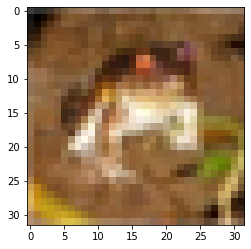

In [10]:
# Pintamos la primera foto:
plt.imshow(x_train_cnn[0][:,:,:])

# Modelo I

In [11]:
model = ks.Sequential()

model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                98336     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 98,666
Trainable params: 98,666
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], )

In [14]:
# Vamos a definir un Callback para intentar evitar el overfitting
# Controlando el error de validacion. Si este no mejora en 10 epochs, ha de pararse:
Callback = EarlyStopping(monitor='val_loss', patience=10)

In [15]:
t = time.perf_counter()

In [16]:
history = model.fit(x_train_cnn, y_train, epochs=300, use_multiprocessing=False, validation_data=(x_val_cnn, y_val), batch_size=512, callbacks=[Callback])

Epoch 1/300
79/79 [==============================] - 1s 8ms/step - loss: 2.1838 - accuracy: 0.1983 - val_loss: 2.1407 - val_accuracy: 0.2140
Epoch 2/300
79/79 [==============================] - 0s 5ms/step - loss: 2.0521 - accuracy: 0.2560 - val_loss: 2.1086 - val_accuracy: 0.1879
Epoch 3/300
79/79 [==============================] - 0s 5ms/step - loss: 1.9856 - accuracy: 0.2870 - val_loss: 2.0662 - val_accuracy: 0.2191
Epoch 4/300
79/79 [==============================] - 0s 5ms/step - loss: 1.9431 - accuracy: 0.3131 - val_loss: 1.9417 - val_accuracy: 0.2999
Epoch 5/300
79/79 [==============================] - 0s 5ms/step - loss: 1.9095 - accuracy: 0.3311 - val_loss: 1.9254 - val_accuracy: 0.3214
Epoch 6/300
79/79 [==============================] - 0s 5ms/step - loss: 1.8819 - accuracy: 0.3455 - val_loss: 1.9378 - val_accuracy: 0.3065
Epoch 7/300
79/79 [==============================] - 0s 5ms/step - loss: 1.8627 - accuracy: 0.3532 - val_loss: 1.8849 - val_accuracy: 0.3340
Epoch 8/300
7

In [17]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:00:49.082873


In [18]:
model.evaluate(x_test_cnn,  y_test, verbose=2)

313/313 - 1s - loss: 1.6747 - accuracy: 0.4114


[1.674710750579834, 0.4113999903202057]

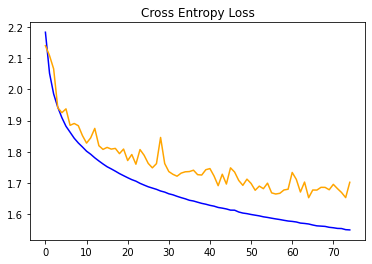

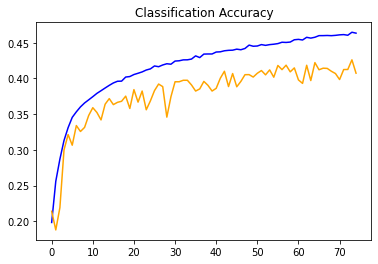

In [19]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()

# MODELO II

In [20]:
# Creacion del modelo
model = ks.Sequential()

model.add(ks.layers.Conv2D(32, (3, 3),strides=1, input_shape=(32, 32,3), padding='same', activation='relu'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [22]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], )

In [23]:
t = time.perf_counter()

In [24]:
history = model.fit(x_train_cnn, y_train, epochs=300, use_multiprocessing=False, validation_data=(x_val_cnn, y_val), batch_size=512, callbacks=[Callback])

Epoch 1/300
79/79 [==============================] - 2s 23ms/step - loss: 2.2903 - accuracy: 0.1253 - val_loss: 2.2725 - val_accuracy: 0.1565
Epoch 2/300
79/79 [==============================] - 2s 20ms/step - loss: 2.2532 - accuracy: 0.1648 - val_loss: 2.2187 - val_accuracy: 0.2163
Epoch 3/300
79/79 [==============================] - 2s 20ms/step - loss: 2.1954 - accuracy: 0.2037 - val_loss: 2.1510 - val_accuracy: 0.2294
Epoch 4/300
79/79 [==============================] - 2s 21ms/step - loss: 2.1126 - accuracy: 0.2448 - val_loss: 2.1577 - val_accuracy: 0.2289
Epoch 5/300
79/79 [==============================] - 2s 20ms/step - loss: 2.0484 - accuracy: 0.2725 - val_loss: 1.9876 - val_accuracy: 0.3011
Epoch 6/300
79/79 [==============================] - 2s 20ms/step - loss: 1.9790 - accuracy: 0.3025 - val_loss: 1.9311 - val_accuracy: 0.3299
Epoch 7/300
79/79 [==============================] - 2s 20ms/step - loss: 1.9328 - accuracy: 0.3212 - val_loss: 1.9034 - val_accuracy: 0.3338
Epoch 

In [25]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:04:23.399749


In [26]:
model.evaluate(x_test_cnn,  y_test, verbose=2)

313/313 - 1s - loss: 1.0801 - accuracy: 0.6286


[1.0800789594650269, 0.628600001335144]

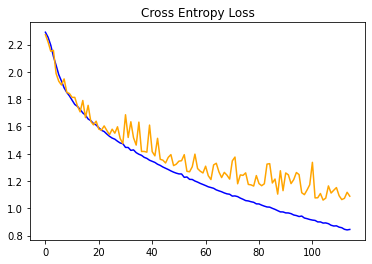

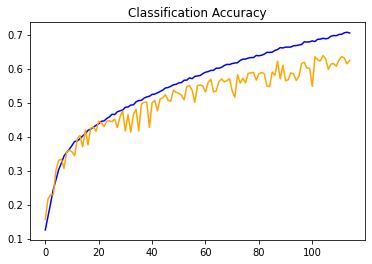

In [27]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()

# MODELO III

In [28]:
# Creacion del modelo
model = ks.Sequential()

model.add(ks.layers.Conv2D(32, (3, 3),strides=1, input_shape=(32, 32,3), padding='same', activation='relu'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)       

In [30]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], )

In [31]:
t = time.perf_counter()

In [32]:
history = model.fit(x_train_cnn, y_train, epochs=300, use_multiprocessing=False, validation_data=(x_val_cnn, y_val), batch_size=512, callbacks=[Callback])

Epoch 1/300
79/79 [==============================] - 2s 26ms/step - loss: 2.3013 - accuracy: 0.1040 - val_loss: 2.2963 - val_accuracy: 0.1151
Epoch 2/300
79/79 [==============================] - 2s 23ms/step - loss: 2.2925 - accuracy: 0.1136 - val_loss: 2.2876 - val_accuracy: 0.1137
Epoch 3/300
79/79 [==============================] - 2s 23ms/step - loss: 2.2812 - accuracy: 0.1172 - val_loss: 2.2695 - val_accuracy: 0.1207
Epoch 4/300
79/79 [==============================] - 2s 23ms/step - loss: 2.2540 - accuracy: 0.1291 - val_loss: 2.2243 - val_accuracy: 0.1429
Epoch 5/300
79/79 [==============================] - 2s 23ms/step - loss: 2.2000 - accuracy: 0.1632 - val_loss: 2.1587 - val_accuracy: 0.1878
Epoch 6/300
79/79 [==============================] - 2s 23ms/step - loss: 2.1267 - accuracy: 0.2008 - val_loss: 2.1065 - val_accuracy: 0.1951
Epoch 7/300
79/79 [==============================] - 2s 23ms/step - loss: 2.0758 - accuracy: 0.2301 - val_loss: 2.0477 - val_accuracy: 0.2643
Epoch 

In [33]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

In [34]:
print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:08:36.529951


In [35]:
model.evaluate(x_test_cnn,  y_test, verbose=2)

313/313 - 1s - loss: 1.1932 - accuracy: 0.5754


[1.1932218074798584, 0.5753999948501587]

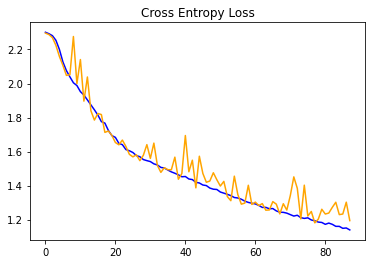

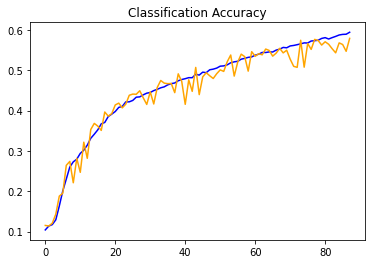

In [36]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()

# MODLEO IV

In [37]:
# Creacion del modelo
model = ks.Sequential()

model.add(ks.layers.Conv2D(32, (3, 3),strides=1, input_shape=(32, 32,3), padding='same', activation='relu'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 32)       

In [39]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], )

In [40]:
t = time.perf_counter()

In [41]:
history = model.fit(x_train_cnn, y_train, epochs=300, use_multiprocessing=False, validation_data=(x_val_cnn, y_val), batch_size=512, callbacks=[Callback])

Epoch 1/300
79/79 [==============================] - 2s 27ms/step - loss: 2.3017 - accuracy: 0.1016 - val_loss: 2.3001 - val_accuracy: 0.1020
Epoch 2/300
79/79 [==============================] - 2s 24ms/step - loss: 2.2994 - accuracy: 0.1102 - val_loss: 2.2974 - val_accuracy: 0.1111
Epoch 3/300
79/79 [==============================] - 2s 24ms/step - loss: 2.2947 - accuracy: 0.1201 - val_loss: 2.2912 - val_accuracy: 0.1307
Epoch 4/300
79/79 [==============================] - 2s 24ms/step - loss: 2.2833 - accuracy: 0.1328 - val_loss: 2.2742 - val_accuracy: 0.1660
Epoch 5/300
79/79 [==============================] - 2s 24ms/step - loss: 2.2522 - accuracy: 0.1637 - val_loss: 2.2250 - val_accuracy: 0.1715
Epoch 6/300
79/79 [==============================] - 2s 24ms/step - loss: 2.1967 - accuracy: 0.1896 - val_loss: 2.1705 - val_accuracy: 0.2055
Epoch 7/300
79/79 [==============================] - 2s 24ms/step - loss: 2.1577 - accuracy: 0.2066 - val_loss: 2.1323 - val_accuracy: 0.2223
Epoch 

In [42]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Tiempo de entrenamiento:', elapsed_time)


Tiempo de entrenamiento: 0:04:35.268753


In [43]:
model.evaluate(x_test_cnn,  y_test, verbose=2)

313/313 - 1s - loss: 1.3495 - accuracy: 0.5127


[1.3494598865509033, 0.5127000212669373]

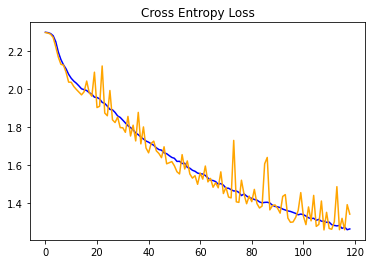

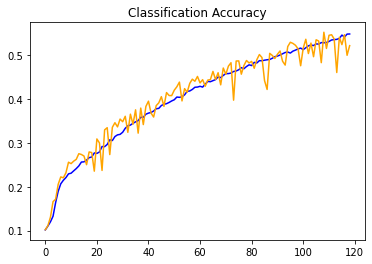

In [44]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()

# MODELO V

In [45]:
# Creacion del modelo
model = ks.Sequential()

model.add(ks.layers.Conv2D(32, (3, 3),strides=1, input_shape=(32, 32,3), padding='same', activation='relu'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(512, activation='relu'))
model.add(ks.layers.Dropout(0.5))
model.add(ks.layers.Dense(512, activation='relu'))
model.add(ks.layers.Dropout(0.5))
model.add(ks.layers.Dense(num_classes, activation='softmax'))

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 32)       

In [47]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], )

In [48]:
t = time.perf_counter()

In [49]:
history = model.fit(x_train_cnn, y_train, epochs=300, use_multiprocessing=False, validation_data=(x_val_cnn, y_val), batch_size=512, callbacks=[Callback])



Epoch 1/300
79/79 [==============================] - 2s 27ms/step - loss: 2.3037 - accuracy: 0.0979 - val_loss: 2.3017 - val_accuracy: 0.1108
Epoch 2/300
79/79 [==============================] - 2s 24ms/step - loss: 2.3014 - accuracy: 0.1043 - val_loss: 2.3010 - val_accuracy: 0.1259
Epoch 3/300
79/79 [==============================] - 2s 24ms/step - loss: 2.3004 - accuracy: 0.1049 - val_loss: 2.3001 - val_accuracy: 0.1338
Epoch 4/300
79/79 [==============================] - 2s 24ms/step - loss: 2.2986 - accuracy: 0.1120 - val_loss: 2.2985 - val_accuracy: 0.1400
Epoch 5/300
79/79 [==============================] - 2s 24ms/step - loss: 2.2965 - accuracy: 0.1120 - val_loss: 2.2959 - val_accuracy: 0.1497
Epoch 6/300
79/79 [==============================] - 2s 24ms/step - loss: 2.2923 - accuracy: 0.1159 - val_loss: 2.2916 - val_accuracy: 0.1589
Epoch 7/300
79/79 [==============================] - 2s 24ms/step - loss: 2.2859 - accuracy: 0.1239 - val_loss: 2.2852 - val_accuracy: 0.1760
Epoch 

In [50]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:07:02.463402


In [51]:
model.evaluate(x_test_cnn,  y_test, verbose=2)

313/313 - 1s - loss: 1.3509 - accuracy: 0.5000


[1.3509176969528198, 0.5]

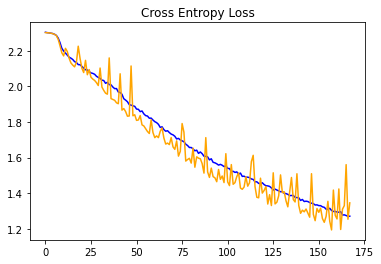

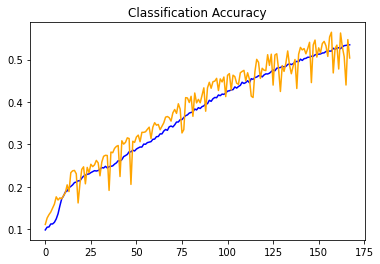

In [52]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()

# MODELO VI

In [61]:
# Creacion del modelo
model = ks.Sequential()

model.add(ks.layers.Conv2D(32, (3, 3),strides=1, input_shape=(32, 32,3), padding='same', activation='relu'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.Conv2D(32, (3, 3),strides=1, activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(512, activation='relu'))
model.add(ks.layers.Dropout(0.5))
model.add(ks.layers.Dense(512, activation='relu'))
model.add(ks.layers.Dropout(0.5))
model.add(ks.layers.Dense(512, activation='relu'))
model.add(ks.layers.Dropout(0.5))
model.add(ks.layers.Dense(num_classes, activation='softmax'))

In [62]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 32)       

In [63]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'], )

In [64]:
t = time.perf_counter()

In [65]:
history = model.fit(x_train_cnn, y_train, epochs=300, use_multiprocessing=False, validation_data=(x_val_cnn, y_val), batch_size=512, callbacks=[Callback])

Epoch 1/300
79/79 [==============================] - 2s 28ms/step - loss: 2.1155 - accuracy: 0.1956 - val_loss: 1.9778 - val_accuracy: 0.2700
Epoch 2/300
79/79 [==============================] - 2s 25ms/step - loss: 1.8136 - accuracy: 0.3187 - val_loss: 1.8975 - val_accuracy: 0.3169
Epoch 3/300
79/79 [==============================] - 2s 25ms/step - loss: 1.6331 - accuracy: 0.3880 - val_loss: 1.4742 - val_accuracy: 0.4582
Epoch 4/300
79/79 [==============================] - 2s 25ms/step - loss: 1.5072 - accuracy: 0.4435 - val_loss: 1.3584 - val_accuracy: 0.4933
Epoch 5/300
79/79 [==============================] - 2s 25ms/step - loss: 1.4139 - accuracy: 0.4809 - val_loss: 1.2658 - val_accuracy: 0.5381
Epoch 6/300
79/79 [==============================] - 2s 25ms/step - loss: 1.3233 - accuracy: 0.5162 - val_loss: 1.1857 - val_accuracy: 0.5687
Epoch 7/300
79/79 [==============================] - 2s 25ms/step - loss: 1.2413 - accuracy: 0.5474 - val_loss: 1.1999 - val_accuracy: 0.5636
Epoch 

In [58]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:03:52.662192


In [59]:
model.evaluate(x_test_cnn,  y_test, verbose=2)

313/313 - 1s - loss: 0.6294 - accuracy: 0.7947


[0.6294440031051636, 0.794700026512146]

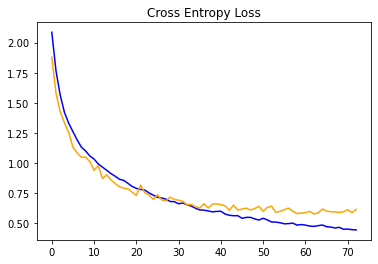

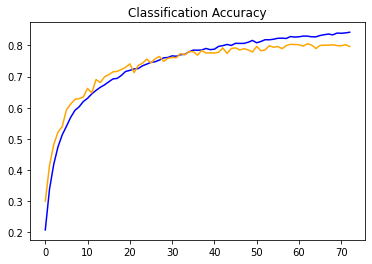

In [60]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()